# TensorFlow 2.x 강의 04] Linear Regression (개념과 손실함수)

## 회귀(Regression) : 
Training Data를 이용하여 데이터의 특성과 상관관계등을 파악하고, 그 결과를 바탕으로 Training Data에 없는 미지의 데이터가 주어졌을 경우에, 그 결과를 연속적인(숫자) 값으로 예측하는 것

ex) 공부시간과 시험성적의 관계, 집 평수와 집 가격의 관계 

## 학습 개념 
- 트레이닝 데이터를 분석/ y = Wx + b
- 데이터의 특성을 가장 잘 표현할(선), w와 b를 찾아가는 것 
- 가설(가상의 선)과 실제 데이터의 오차 줄여나가기~~ 최소가 되는 것 찾아가기 Losss Function
 

## 경사하강법 
y = Wx + b
손실함수가 최소값을 갖는다 = 결과를 잘 예측할 수 있다. 

손실함수가 최소가 되는 W와 b를 찾는 것이 회귀구현 최종 목표

=> 경사하강법 / 예전 것 복습해보기
1. 임의의 가중치 선택
2. W에서 직선의 기울기를 나타내는 미분값 미분
3. 미분값이 작아지는 방향으로 w를 줄여나감, w가 최소가 되는 부분이 바로 최소값

=> W에서의 직선의 기울기인 미분 값 이용, 그 값이 작아지는 방향으로 진행하여 손실함수 최소값을 찾는 방법 = 경사하강법

편미분값이 양수일때는 빼고, 음수 일때는
편미분 값에서 더해야한다. 그래프 왼쪽 오른 쪽 생각해보기

W  - a*편미분

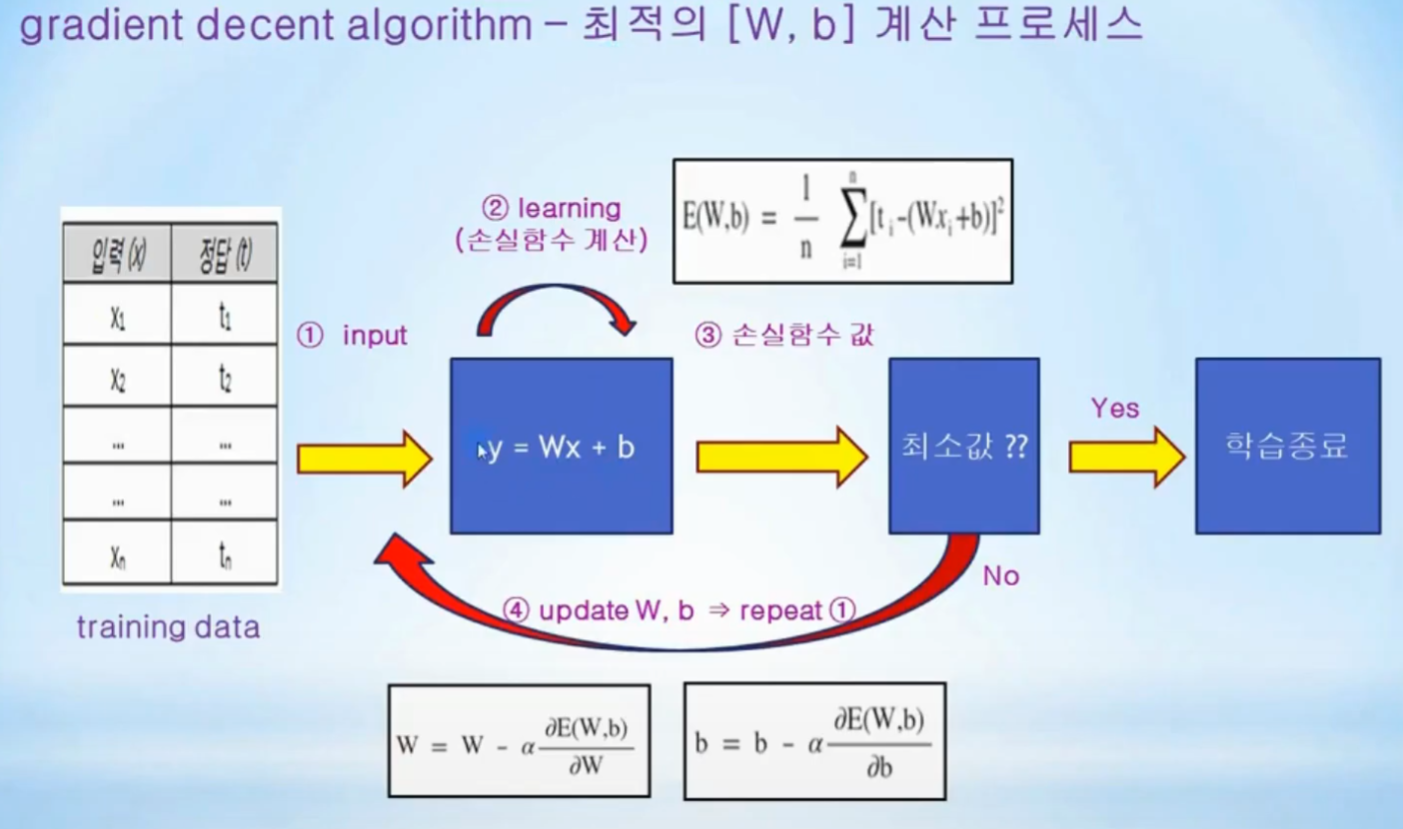




# 구현해보기

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

print(tf.__version__)

2.7.0


In [3]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [4]:
# Linear Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(1, input_shape=(3, ),activation='linear'))  # 노드 3개인 출력층 생성 / 리니어 

In [5]:
 # 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

In [7]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())

<class 'keras.callbacks.History'>
dict_keys(['loss'])


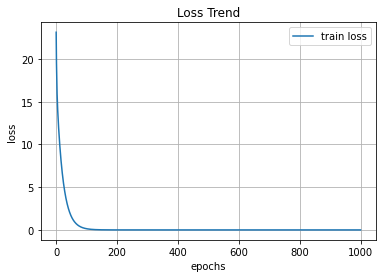

In [8]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')


plt.show()

In [9]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-5.0001254]
 [-2.999966 ]
 [-3.999692 ]
 [ 8.999645 ]
 [ 7.000192 ]]
[-5, -3, -4, 9, 7]


In [11]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9999641],
       [-3.0000386],
       [ 1.999975 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00024694], dtype=float32)>]
